In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cpi
# Show all columns
pd.set_option('display.max_columns', None)

In [2]:
# Read the data
player = pd.read_csv('data/player_stats.csv')

In [3]:
# Drop all all columns with missing values in salary column
player = player.dropna(subset=['salary'])
# Adjust for inflation
player["adj_salary"] = [cpi.inflate(salary, year, to=2016) for salary, year in zip(player.salary, player.yearID)]

<AxesSubplot: >

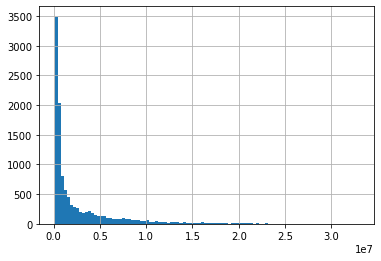

In [10]:
player["adj_salary"].hist(bins=100)

<AxesSubplot: >

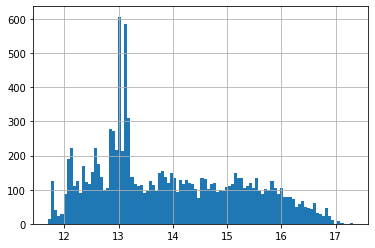

In [11]:
# Log transform the salary
player["log_salary"] = np.log(player["adj_salary"])
player["log_salary"].hist(bins=100)

<AxesSubplot: >

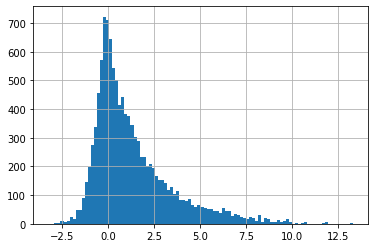

In [12]:
player["br_WAR_total"].hist(bins=100)

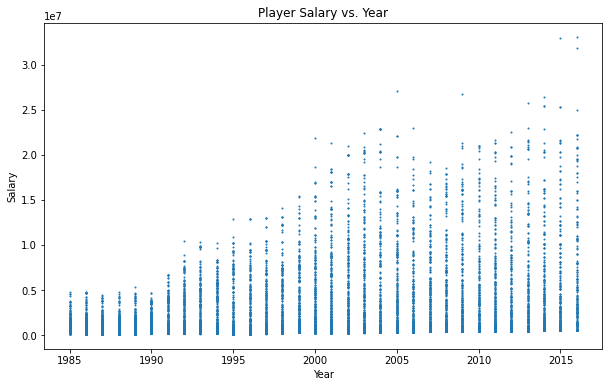

In [4]:
# plot player salary vs. year
plt.figure(figsize=(10, 6))
plt.scatter(player.yearID, player.adj_salary, s=1)
plt.xlabel('Year')
plt.ylabel('Salary')
plt.title('Player Salary vs. Year')
plt.show()

In [15]:
# Create a Linear regression of salarY predicted bY br_WAR_total for 2014 season onlY
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Adjust the Year column bY subtracting 1 from all Years
player['YearID'] = player['YearID'] - 1

# Create X and Y
X = player[['br_WAR_total']]
Y = player['log_salarY']
# Create a linear regression object
reg = LinearRegression()

# Fit the model to the training data
reg.fit(X, Y)

# Print the coefficients
print("Slope: ", reg.coef_)
print("Intercept: ", reg.intercept_)
# Print the R^2 for the model against the test data
print("R^2 score: ", reg.score(x, Y))

# Plot the model
# Figure size
plt.figure(figsize=(10, 6))
plt.scatter(X, Y,  color='black')
plt.plot(X, reg.predict(X), color='blue', linewidth=3)
# x_label
plt.xlabel('br_WAR_total', size =10)
# Y_label
plt.Ylabel('Log salarY', size = 10)
# title
plt.title('Linear Regression of salarY predicted bY br_WAR_total for 2014 season onlY', size = 15)
# show the plot
plt.show()

NameError: name 'plaYer' is not defined